In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
accu_score=[]

In [109]:
df=pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [110]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [111]:
df.shape

(3276, 10)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [113]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [114]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [115]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

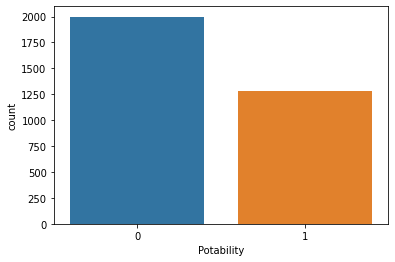

In [116]:
sns.countplot(df['Potability'])
plt.show()

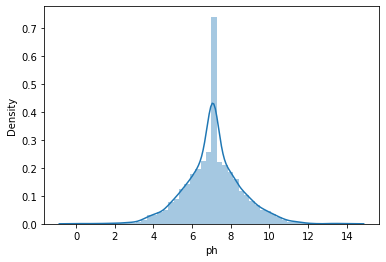

In [117]:
sns.distplot(df['ph'])
plt.show()

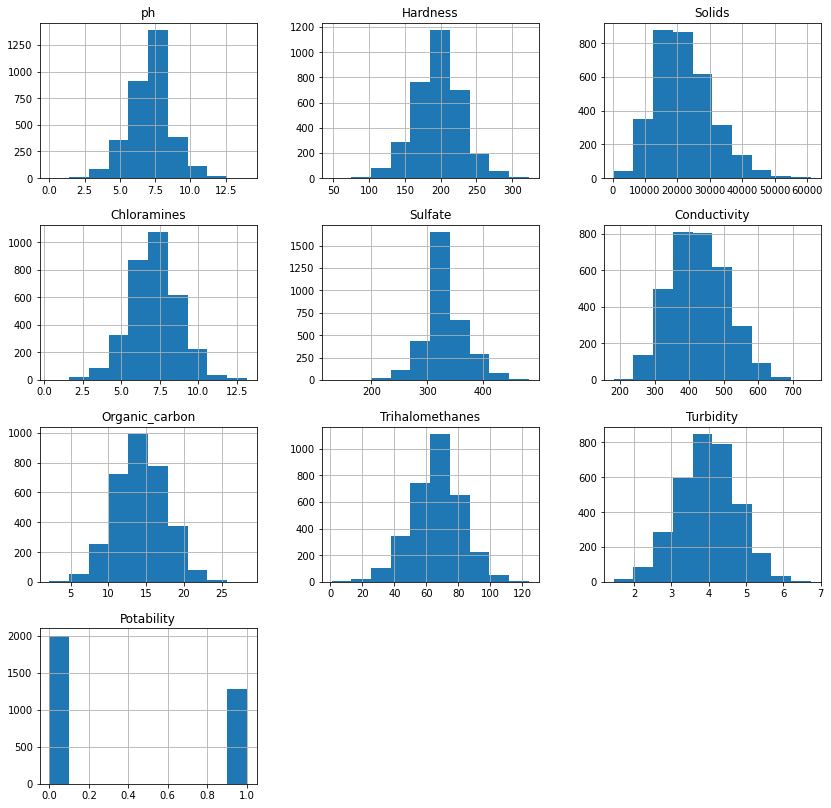

In [118]:
df.hist(figsize=(14,14))
plt.show()

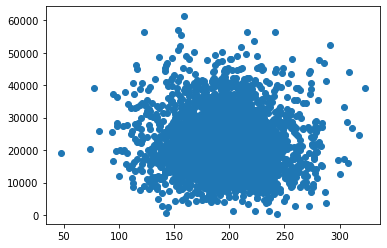

In [124]:
plt.scatter(df['Hardness'],df['Solids'])
plt.show()

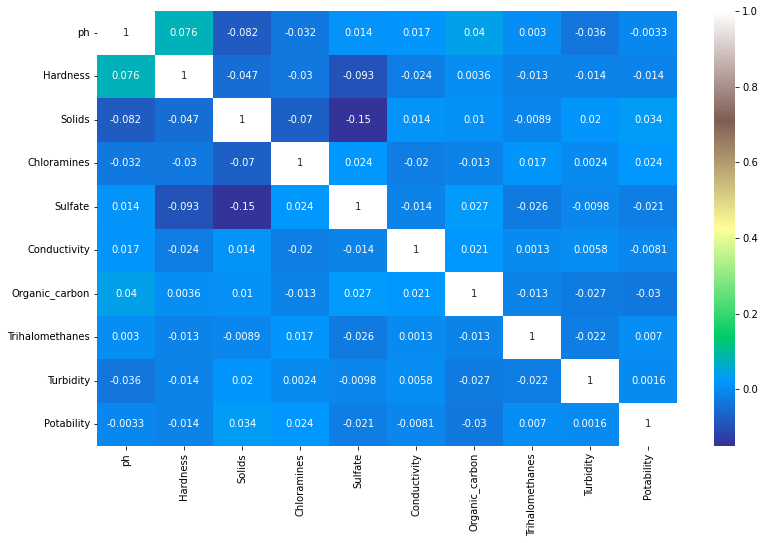

In [126]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap="terrain")
plt.show()

<AxesSubplot:>

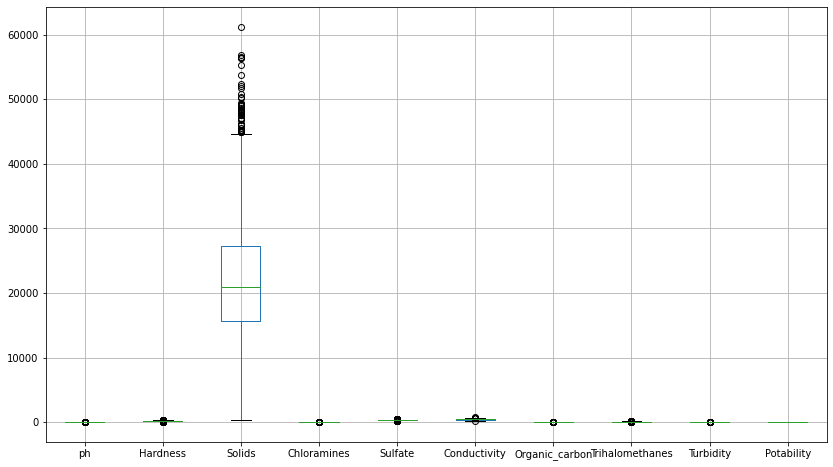

In [127]:
df.boxplot(figsize=(14,8))

In [128]:
x=df.drop('Potability',axis=1)
y=df['Potability']

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101,shuffle=True)

DECISION TREE 

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion="gini",min_samples_split=10,splitter="best")
dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=10)

In [131]:
prediction=dt.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,prediction)*100)
print("Confusion matrix :\n",confusion_matrix(y_test,prediction))
print("Classification Report :\n",classification_report(y_test,prediction))

Accuracy score : 58.231707317073166
Confusion matrix :
 [[272 130]
 [144 110]]
Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.68      0.67       402
           1       0.46      0.43      0.45       254

    accuracy                           0.58       656
   macro avg       0.56      0.55      0.56       656
weighted avg       0.58      0.58      0.58       656



In [133]:
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score for DecisionTree : ', roc_auc_score(y_test,prediction)*100)
accu_score.append( roc_auc_score(y_test,prediction)*100)

roc_auc_score for DecisionTree :  55.4843890782309


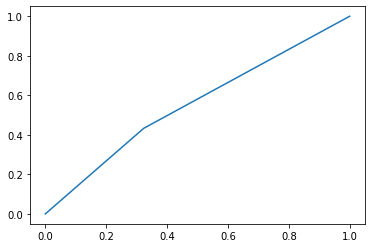

In [134]:
fpr,tpr,threshold=roc_curve(y_test,prediction)
plt.plot(fpr,tpr)

In [135]:
res=dt.predict([[5.73,158.31,25363.01,7.73,377.55,568.31,13.63,75.96,4.74]])[0]
print("1 : Potable\n2 : Non-Potable")
print("The prediction for a single set is :",res)

1 : Potable
2 : Non-Potable
The prediction for a single set is : 1


In [136]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model=DecisionTreeClassifier()
criterion=['gini','entropy']
splitter=['best','random']
min_samples_split=[2,4,6,8,10,12,14]

grid=dict(splitter=splitter,criterion=criterion,min_samples_split=min_samples_split)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search_dt=GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy',error_score=0)
grid_search_dt.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [137]:
print("Training Score :",grid_search_dt.score(x_train,y_train)*100)
print("Testing Score :",grid_search_dt.score(x_test,y_test)*100)

Training Score : 80.30534351145037
Testing Score : 58.38414634146341


LOGISTIC REGRESSION

In [138]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(random_state=2)
logr.fit(x_train,y_train)

LogisticRegression(random_state=2)

In [139]:
y_pred=logr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [140]:
cm1=confusion_matrix(y_test,y_pred)
cm1

array([[402,   0],
       [254,   0]], dtype=int64)

In [141]:
print("Accuracy Score for Logistic Regression :",accuracy_score(y_test,y_pred)*100)
accu_score.append(accuracy_score(y_test,y_pred)*100)

Accuracy Score for Logistic Regression : 61.28048780487805


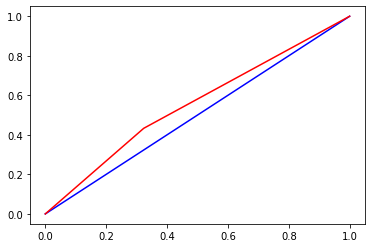

In [142]:
fpr1,tpr1,threshold1=roc_curve(y_test,y_pred)
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr,tpr,'r')

In [143]:
print("Classification Report :\n",classification_report(y_test,y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       402
           1       0.00      0.00      0.00       254

    accuracy                           0.61       656
   macro avg       0.31      0.50      0.38       656
weighted avg       0.38      0.61      0.47       656



NAIVE BAYES

In [144]:
from sklearn.naive_bayes import GaussianNB  
naive = GaussianNB()  
naive.fit(x_train, y_train)  

GaussianNB()

In [146]:
y_pred3=naive.predict(x_test)  
y_pred3

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [147]:
cm3= confusion_matrix(y_test,y_pred3)  
cm3

array([[363,  39],
       [193,  61]], dtype=int64)

In [148]:
print("Accuracy Score for Naive Bayes :",accuracy_score(y_test,y_pred3)*100)
accu_score.append(accuracy_score(y_test,y_pred3)*100)

Accuracy Score for Naive Bayes : 64.63414634146342


In [149]:
res2=naive.predict([[5.73,158.31,25363.01,7.73,377.55,568.31,13.63,75.96,4.74]])[0]
res2

0

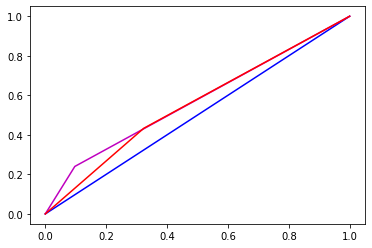

In [150]:
fpr3,tpr3,threshold3=roc_curve(y_test,y_pred3)
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr3,tpr3,'m')
plt.plot(fpr,tpr,'r')

In [151]:
print("Classification Report :\n",classification_report(y_test,y_pred3))

Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.90      0.76       402
           1       0.61      0.24      0.34       254

    accuracy                           0.65       656
   macro avg       0.63      0.57      0.55       656
weighted avg       0.64      0.65      0.60       656



KNN CLASSIFIER

In [152]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=8)
k.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [153]:
y_pred4=k.predict(x_test)
y_pred4

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [154]:
cm4= confusion_matrix(y_test,y_pred4)  
cm4

array([[352,  50],
       [216,  38]], dtype=int64)

In [155]:
print("Accuracy Score for KNN :",accuracy_score(y_test,y_pred4)*100)
accu_score.append(accuracy_score(y_test,y_pred4)*100)

Accuracy Score for KNN : 59.45121951219512


In [156]:
res3=k.predict([[5.73,158.31,25363.01,7.73,377.55,568.31,13.63,75.96,4.74]])[0]
res3

0

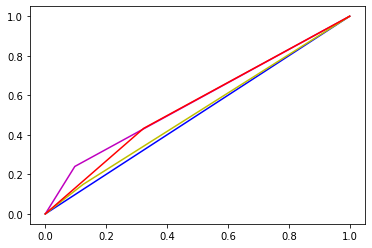

In [157]:
fpr4,tpr4,threshold4=roc_curve(y_test,y_pred4)
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr3,tpr3,'m')
plt.plot(fpr4,tpr4,'y')
plt.plot(fpr,tpr,'r')

In [158]:
print("Classification Report :\n",classification_report(y_test,y_pred4))

Classification Report :
               precision    recall  f1-score   support

           0       0.62      0.88      0.73       402
           1       0.43      0.15      0.22       254

    accuracy                           0.59       656
   macro avg       0.53      0.51      0.47       656
weighted avg       0.55      0.59      0.53       656



RANDOM FOREST

In [159]:
from sklearn.ensemble import RandomForestClassifier
R=RandomForestClassifier(n_estimators=10,criterion="entropy")
R.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [160]:
y_pred5=R.predict(x_test)
y_pred5

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [161]:
cm5=confusion_matrix(y_test,y_pred5)  
cm5

array([[351,  51],
       [175,  79]], dtype=int64)

In [162]:
print("Accuracy Score for random Forest :",accuracy_score(y_test,y_pred5)*100)
accu_score.append(accuracy_score(y_test,y_pred5)*100)

Accuracy Score for random Forest : 65.54878048780488


In [163]:
res4=R.predict([[5.73,158.31,25363.01,7.73,377.55,568.31,13.63,75.96,4.74]])[0]
res4

0

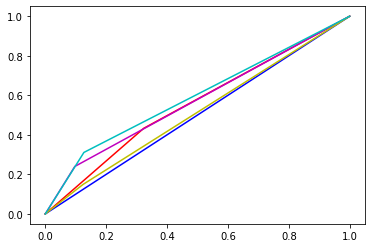

In [164]:
fpr5,tpr5,threshold5=roc_curve(y_test,y_pred5)
plt.plot(fpr,tpr,'r')
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr3,tpr3,'m')
plt.plot(fpr4,tpr4,'y')
plt.plot(fpr5,tpr5,'c')

In [165]:
print("Classification Report :\n",classification_report(y_test,y_pred5))

Classification Report :
               precision    recall  f1-score   support

           0       0.67      0.87      0.76       402
           1       0.61      0.31      0.41       254

    accuracy                           0.66       656
   macro avg       0.64      0.59      0.58       656
weighted avg       0.64      0.66      0.62       656



SUPPORT VECTOR MACHINE

In [166]:
#SVM-LINEAR,POLY,RBF WERE SIMILAR TO LOGISTIC REGRESSION
from sklearn.svm import SVC
S=SVC(kernel='sigmoid')
S.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [167]:
y_pred6=S.predict(x_test)
y_pred6

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [168]:
cm6=confusion_matrix(y_test,y_pred6)  
cm6

array([[237, 165],
       [146, 108]], dtype=int64)

In [169]:
print("Accuracy Score for SVM :",accuracy_score(y_test,y_pred6)*100)
accu_score.append(accuracy_score(y_test,y_pred6)*100)

Accuracy Score for SVM : 52.59146341463414


In [170]:
res5=S.predict([[5.73,158.31,25363.01,7.73,377.55,568.31,13.63,75.96,4.74]])[0]
res5

0

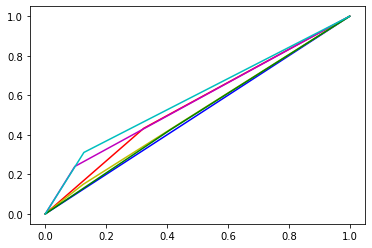

In [171]:
fpr6,tpr6,threshold6=roc_curve(y_test,y_pred6)
plt.plot(fpr,tpr,'r')
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr3,tpr3,'m')
plt.plot(fpr4,tpr4,'y')
plt.plot(fpr6,tpr6,'g')
plt.plot(fpr5,tpr5,'c')

In [172]:
print("Classification Report :\n",classification_report(y_test,y_pred6))

Classification Report :
               precision    recall  f1-score   support

           0       0.62      0.59      0.60       402
           1       0.40      0.43      0.41       254

    accuracy                           0.53       656
   macro avg       0.51      0.51      0.51       656
weighted avg       0.53      0.53      0.53       656



GRADIENT BOOSTING

In [173]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [174]:
y_pred7=gbc.predict(x_test)
y_pred7

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [175]:
cm7=confusion_matrix(y_test,y_pred7)  
cm7

array([[349,  53],
       [163,  91]], dtype=int64)

In [176]:
print("Accuracy Score for Gradient Boosting :",accuracy_score(y_test,y_pred7)*100)
accu_score.append(accuracy_score(y_test,y_pred7)*100)

Accuracy Score for Gradient Boosting : 67.07317073170732


In [179]:
res6=gbc.predict([[5.73,158.31,25363.01,7.73,377.55,568.31,13.63,75.96,4.74]])[0]
res6

0

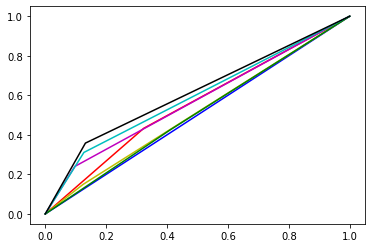

In [180]:
fpr7,tpr7,threshold7=roc_curve(y_test,y_pred7)
plt.plot(fpr,tpr,'r')
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr3,tpr3,'m')
plt.plot(fpr4,tpr4,'y')
plt.plot(fpr6,tpr6,'g')
plt.plot(fpr5,tpr5,'c')
plt.plot(fpr7,tpr7,'k')

In [181]:
print("Classification Report :\n",classification_report(y_test,y_pred7))

Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.87      0.76       402
           1       0.63      0.36      0.46       254

    accuracy                           0.67       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.66      0.67      0.65       656



BAGGING CLASSIFIER

In [182]:
from sklearn.ensemble import BaggingClassifier
B=BaggingClassifier(base_estimator=model,n_estimators=500,random_state=8)
B.fit(x_train,y_train)  

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=8)

In [183]:
y_pred8=B.predict(x_test)
y_pred8

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [184]:
cm8=confusion_matrix(y_test,y_pred8)  
cm8

array([[343,  59],
       [147, 107]], dtype=int64)

In [185]:
print("Accuracy Score for Bagging :",accuracy_score(y_test,y_pred8)*100)
accu_score.append(accuracy_score(y_test,y_pred8)*100)

Accuracy Score for Bagging : 68.59756097560977


In [186]:
res7=B.predict([[5.73,158.31,25363.01,7.73,377.55,568.31,13.63,75.96,4.74]])[0]
res7

0

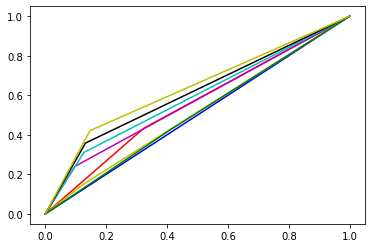

In [187]:
fpr8,tpr8,threshold8=roc_curve(y_test,y_pred8)
plt.plot(fpr,tpr,'r')
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr3,tpr3,'m')
plt.plot(fpr4,tpr4,'y')
plt.plot(fpr6,tpr6,'g')
plt.plot(fpr5,tpr5,'c')
plt.plot(fpr7,tpr7,'k')
plt.plot(fpr8,tpr8,'y')

In [188]:
print("Classification Report :\n",classification_report(y_test,y_pred8))

Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       402
           1       0.64      0.42      0.51       254

    accuracy                           0.69       656
   macro avg       0.67      0.64      0.64       656
weighted avg       0.68      0.69      0.67       656



In [198]:
clas_name=["Decision tree","Logistic Regression","Naive Bayes","KNN","Random Forest","SVM","Gradient Boosting","Bagging classifier"]
d={'CLASSIFIER':clas_name,'ACCURACY SCORE':accu_score}
final=pd.DataFrame(d)
final

,CLASSIFIER,ACCURACY SCORE
0,Decision tree,55.484389
1,Logistic Regression,61.280488
2,Naive Bayes,64.634146
3,KNN,59.451220
4,Random Forest,65.548780
5,SVM,52.591463
6,Gradient Boosting,67.073171
7,Bagging classifier,68.597561


In [201]:
print("The Best Classifier for given dataset is",clas_name[-1],"with an Accuracy Score of :",max(accu_score))

The Best Classifier for given dataset is Bagging classifier with an Accuracy Score of : 68.59756097560977
